## sfq_sim example
\
L. M. Guerrero

In [1]:
import sfq_sim.sfq_core as sfq
import matplotlib.pyplot as plt
import numpy as np
import time
from qutip import basis

### Create a qutrit

Create a qutrit system by defining the qubit frequnecy 'qfreq' and the anharmonicity 'anharm' of the system.
\
Anharmonicity is defined in this package as:
$$
\eta = \frac{\omega_{21} - \omega_q}{\omega_q},
$$
where $\omega_{21}$ is the frequency of the transition between the $|2\rangle \rightarrow |1\rangle $ states and $\omega_q$ is the qubit frequency in units of GHz.

A typical transmon has $\eta \approx 5 \% $, while a fluxonium qubit can have much higher anharmonicity.

In [2]:
fluxonium = sfq.create_qutrit(qfreq= 0.5, anharm = 1.5)

### Applying Quantum Gates

Initialise the qubit in its ground state using the 'Qobj' object from 'qutip' to represent the quantum state.

$$
|0\rangle =  \begin{bmatrix}
1 \\
0 \\
0 
\end{bmatrix}  $$
\
Then apply an $R_Y(\pi)$ gate using SFQ style pulses.

This simulates the Hamiltonian:
$$
H(t) = H_{free} + H_{SFQ}(t), 
$$
where,
$$
H_{free} = \begin{bmatrix} 0 & 0 & 0 \\
0 & \omega_q & 0 \\
0 & 0 & \eta\omega_q + 2\omega_q
\end{bmatrix}
\text{and},
H_{SFQ} = \Omega V(t) \begin{bmatrix} 0 & -1 & 0 \\
1 & 0 & -\sqrt{2} \\
0 & \sqrt{2} & 0
\end{bmatrix}.


In [3]:
psi_0 = basis(3,0)

fluxonium.set_qutrit_state(psi_0)

n = 10 # the number of SFQ pulses applied to the qutrit
theta = np.pi # the desired angle of the rotation

fluxonium.apply_qutrit_sfq_Rygate(n, theta)



10.0%. Run time:   1.13s. Est. time left: 00:00:00:10
20.0%. Run time:   2.29s. Est. time left: 00:00:00:09
30.0%. Run time:   3.39s. Est. time left: 00:00:00:07
40.0%. Run time:   4.64s. Est. time left: 00:00:00:06
50.0%. Run time:   5.88s. Est. time left: 00:00:00:05
60.0%. Run time:   6.99s. Est. time left: 00:00:00:04
70.0%. Run time:   8.23s. Est. time left: 00:00:00:03
80.0%. Run time:   9.30s. Est. time left: 00:00:00:02
90.0%. Run time:  10.48s. Est. time left: 00:00:00:01
100.0%. Run time:  11.59s. Est. time left: 00:00:00:00
Total run time:  11.59s


You can examine the quantum state after the SFQ pulse train and explore how the quantum state changed throughout the SFQ pulse train. You can also see the action of gate on the Bloch sphere.

In [4]:
final_state = fluxonium.result["psi"][-1]

final_state

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00336292-0.00580948j]
 [ 0.99338258-0.0280961j ]
 [-0.1103683 +0.01324513j]]

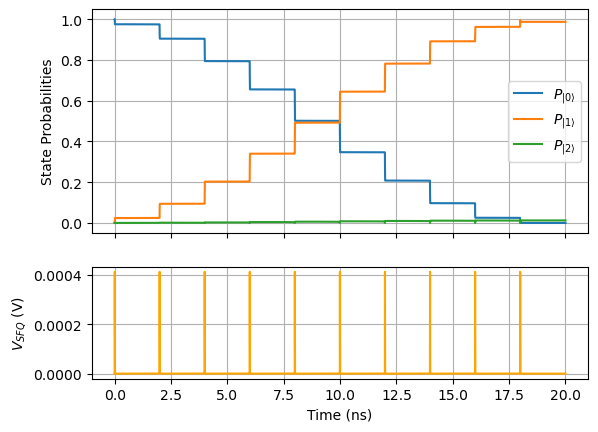

In [5]:
plot = fluxonium.plot_probs(include_pulse=True)

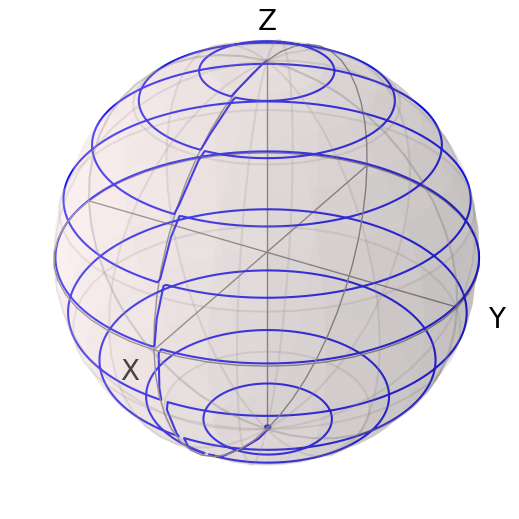

In [6]:
bloch = fluxonium.plot_bloch(n_points=5000)

We can also move the rotating frame of the qubit by applying the transformation:
$$
H \rightarrow \tilde{H} = U^\dag H U + i \dot{U} U,
$$
where $U = \exp(-iH_0 t)$

In this frame we can apply either $R_X(\theta)$ or $R_Y(\theta)$ gates by specifying the `gate` parameter.


In [11]:
psi_0 = basis(3,0)

fluxonium.set_qutrit_state(psi_0)

n = 10
theta = np.pi
gate = "X"

fluxonium.apply_qutrit_sfq_gate_RF(n, gate, theta)

10.0%. Run time:   1.34s. Est. time left: 00:00:00:12
20.0%. Run time:   2.71s. Est. time left: 00:00:00:10
30.0%. Run time:   4.08s. Est. time left: 00:00:00:09
40.0%. Run time:   5.41s. Est. time left: 00:00:00:08
50.0%. Run time:   7.04s. Est. time left: 00:00:00:07
60.0%. Run time:   8.39s. Est. time left: 00:00:00:05
70.0%. Run time:   9.76s. Est. time left: 00:00:00:04
80.0%. Run time:  11.22s. Est. time left: 00:00:00:02
90.0%. Run time:  12.68s. Est. time left: 00:00:00:01
100.0%. Run time:  14.34s. Est. time left: 00:00:00:00
Total run time:  14.34s


In [10]:
final_state = fluxonium.result["psi"][-1]

final_state

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[0.00336263-0.00580962j]
 [0.02809602+0.99338229j]
 [0.11037092-0.01324545j]]

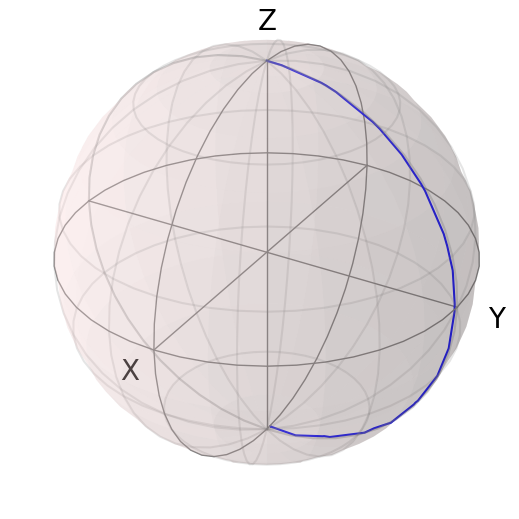

In [9]:
bloch = fluxonium.plot_bloch(n_points=5000)

### Anharmonicity Sweeps
Next we can examine how gate fidelity varies with anharmonicity of the qutrit.
\
\
This package has the option of speeding up these sweeps using multiple cores on your computers CPU.

In [5]:
start_time = time.time()
fluxonium.anharm_sweep(np.arange(1.5,3,0.25),10,np.pi,sweep_progress=True, multicore=0)
finish_time = time.time()
print("Time to complete sweep: ", finish_time-start_time)

Anharmonicity Sweep Progress: 100%|██████████| 6/6 [01:44<00:00, 17.36s/it]

Time to complete sweep:  104.2441143989563


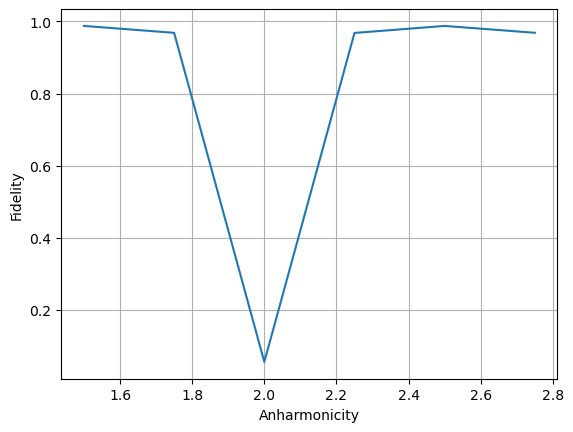

In [6]:
plot2 = fluxonium.plot_anharm_sweep_results()

In [7]:
start_time = time.time()
fluxonium.anharm_sweep(np.arange(1.5,3,0.25),10,np.pi,sweep_progress=True, multicore=6)
finish_time = time.time()
print("Time to complete sweep: ", finish_time-start_time)

100%|██████████| 6/6 [01:02<00:00, 10.33s/it]

Time to complete sweep:  62.22224426269531
